# Oil Price Prediction with Recurrent Neural Networks
Try to predict the prices of brent, based on the daily historical price with the help of the *Recurrent Neural Networks*.

In [56]:
import numpy as np
import pandas as pd

In [57]:
df = pd.read_csv('./datasets/Oil_Prices/brent-daily_csv.csv')

In [58]:
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 2 columns):
Date     8116 non-null object
Price    8116 non-null float64
dtypes: float64(1), object(1)
memory usage: 126.9+ KB


**Plan of Attack**
1. Explore the data and derive features from it.
2. Make a model.

## 1. Exploring the data and derive features from it.

In [60]:
from datetime import datetime

In [61]:
# 1. Fromat the date and create features from it
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%M-%d'))
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)
# df = df.drop('Date', axis=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 5 columns):
Date     8116 non-null datetime64[ns]
Price    8116 non-null float64
Year     8116 non-null int64
Month    8116 non-null int64
Day      8116 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 317.1 KB


In [63]:
X = df.loc[:, ['Year', 'Month', 'Day']].values
y = df.loc[:, 'Price'].values

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

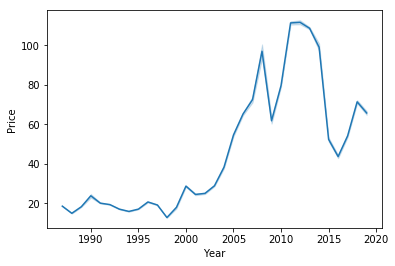

In [66]:
# plotting per year
sns.lineplot(x='Year', y='Price', data=df)
plt.show()

## 2. Training the model